To help make the image tolerant to obstacles

In [1]:
import numpy as np, torch, torchvision, torchvision.transforms as T, matplotlib.pyplot as plt, random as rr
from PIL import Image

def load_image(path):
    img = Image.open(path)
    # img = T.Resize((224, 224))(img)
    img = T.ToTensor()(img) # But this leads to loss of information, so try this:

    # img = T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])(img)
    # Convert to grey scale by averaging the 3 channels
    # img = img.mean(0)
    # Convert to binary file with 0 and 255 based on a threshold = 0.7
    # img = (img > 0.7).float() * 255
    
    # img = img.unsqueeze(0)
    return img

# Important
def max_pool_image(img, kernel_size=2, stride=2):
    img = torch.nn.functional.max_pool2d(img, kernel_size=kernel_size, stride=stride)
    return img

def binarize_image(img, threshold=0.8):
    img = (img > threshold).float() * 255
    return img


    # sh =img.shape
    # for i in range(sh[0]):
    #     for j in range(sh[1]):
    #         if img[i][j] > threshold:
    #             img[i][j] = 1
    #         else:
    #             img[i][j] = 0
    # return img
    
# Less Important
def avg_pool_image(img, kernel_size=2, stride=2):
    img = torch.nn.functional.avg_pool2d(img, kernel_size=kernel_size, stride=stride)
    return img
def upsample_image(img, scale_factor=2): # It is also called deconvolution - it is the opposite of max_pooling. It will increase the size of the image
    img = torch.nn.functional.interpolate(img, scale_factor=scale_factor, mode='nearest')
    return img
def downsample_image(img, scale_factor=2): # It will reduce the size of the 
    img = torch.nn.functional.interpolate(img, scale_factor=1/scale_factor, mode='nearest')
    return img
def convolve_image(img, kernel):
    img = torch.nn.functional.conv2d(img, kernel)
    return img
def normalize_image(img, mean, std):
    img = T.Normalize(mean=mean, std=std)(img)
    return img
def resize_image(img, size):
    img = T.Resize(size)(img)
    return img

def plot_image(img):
    plt.imshow(img[0], cmap='gray')
    plt.show()


In [2]:
def pranav_camera(path):
    img = Image.open(path)
    img = T.ToTensor()(img)
    img = binarize_image(img, threshold=0.1)
    # img = avg_pool_image(img)
    img = max_pool_image(img)
    # img = binarize_image(img, threshold=0.7)
    return img
def manas_camera(path):
    img = Image.open(path)
    img = T.ToTensor()(img)
    img = binarize_image(img, threshold=0.4)
    img = max_pool_image(img)
    img = max_pool_image(img)
    img = max_pool_image(img)
    # img = binarize_image(img, threshold=0.7)
    img = img.int()
    img = img[0]|img[1]|img[2]
    return img


torch.Size([600, 799]) tensor(0.0050)


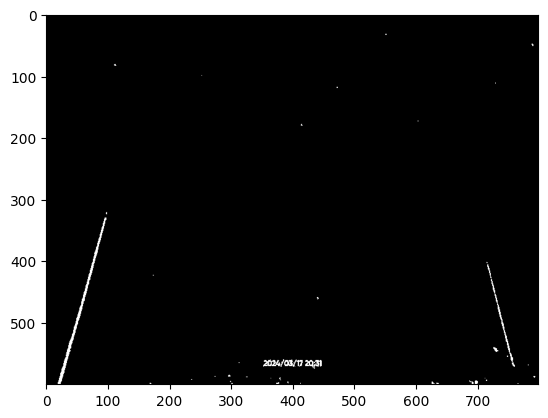

Number of stars: 41
Coordinates of stars: [[32.5, 550.5], [48.5, 787.0], [81.0, 111.0], [99.0, 252.0], [111.5, 728.0], [118.5, 471.5], [173.0, 602.5], [179.333, 413.833], [322.5, 97.667], [332.0, 95.0], [402.667, 714.333], [407.5, 715.0], [423.0, 173.5], [431.0, 721.0], [459.0, 439.0], [541.833, 725.667], [554.5, 747.5], [561.5, 363.0], [561.5, 398.0], [562.2, 420.6], [565.0, 312.5], [568.5, 781.0], [573.333, 433.833], [585.5, 296.0], [587.0, 273.5], [588.0, 325.0], [590.0, 364.0], [590.0, 711.0], [592.0, 235.5], [593.5, 713.5], [594.667, 686.333], [596.0, 696.0], [595.333, 298.667], [596.8, 391.6], [597.833, 625.333], [597.333, 376.333], [598.6, 168.8], [598.75, 301.0], [598.5, 412.0], [598.0, 632.0], [599.0, 764.5]]


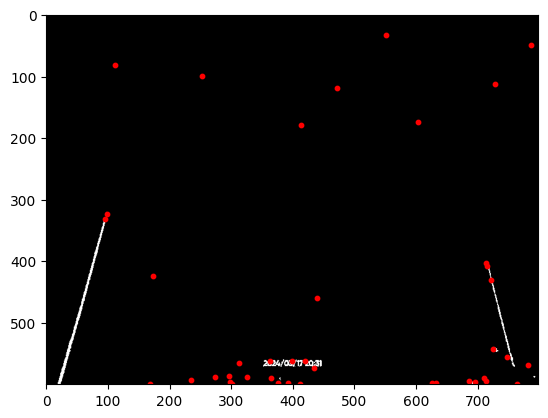

-----------------------------------
torch.Size([600, 799]) tensor(0.0021)


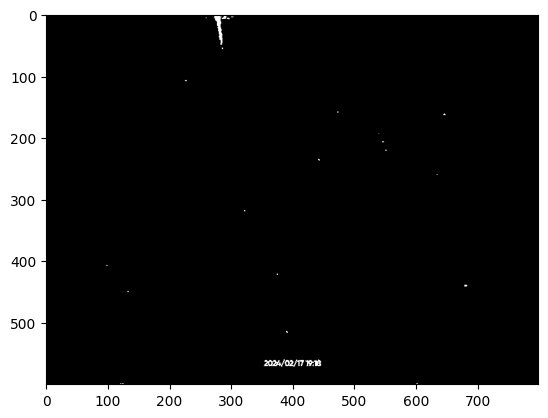

Number of stars: 27
Coordinates of stars: [[0.5, 263.0], [0.0, 269.5], [2.4, 287.6], [4.0, 284.0], [4.2, 301.4], [5.5, 259.0], [6.667, 293.333], [55.2, 285.4], [107.4, 226.2], [158.5, 472.5], [161.0, 645.0], [193.0, 539.0], [206.6, 545.8], [220.5, 550.5], [235.833, 442.0], [260.0, 633.5], [318.5, 321.5], [407.0, 98.0], [421.5, 374.5], [440.0, 678.5], [449.5, 132.5], [560.5, 406.0], [560.5, 441.0], [569.2, 432.6], [599.0, 120.5], [599.0, 124.0], [599.0, 601.0]]


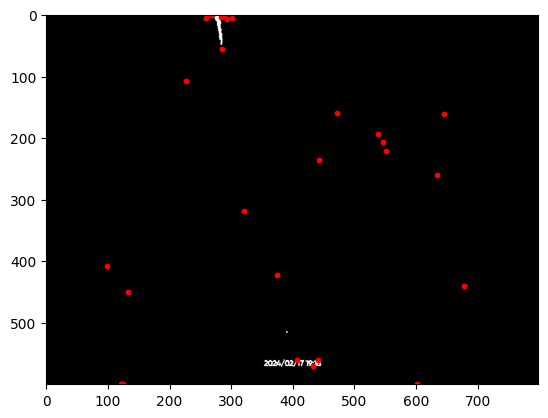

-----------------------------------
torch.Size([600, 799]) tensor(0.0038)


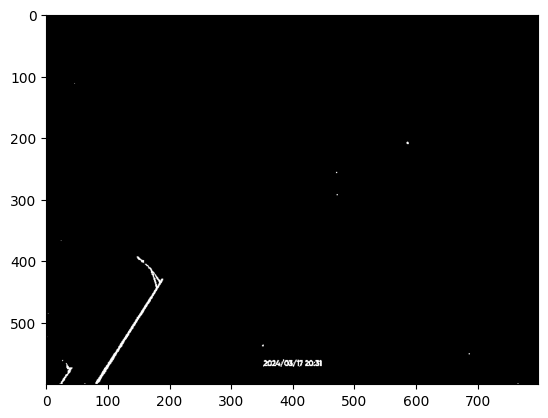

Number of stars: 19
Coordinates of stars: [[112.0, 46.0], [208.5, 584.667], [256.5, 470.5], [292.5, 471.5], [367.0, 24.0], [394.4, 147.6], [406.0, 161.5], [446.0, 0.0], [485.0, 3.0], [522.667, 0.333], [536.0, 351.0], [550.5, 685.5], [561.0, 384.0], [560.5, 405.0], [561.333, 26.333], [562.5, 420.667], [566.333, 32.667], [599.0, 62.5], [599.0, 764.5]]


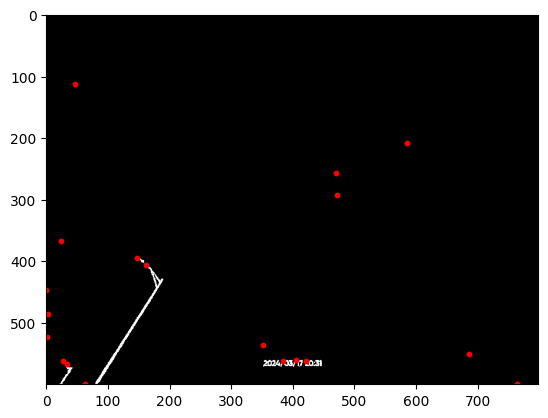

-----------------------------------
torch.Size([600, 799]) tensor(0.0775)


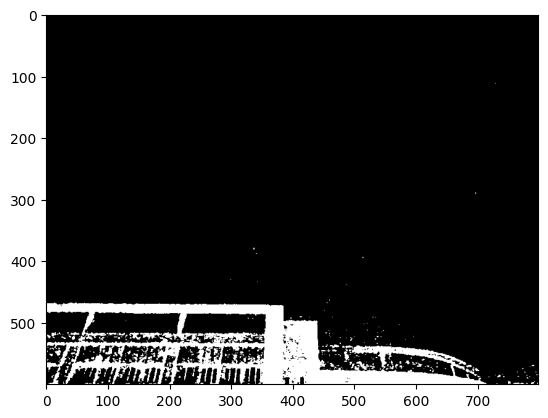

: 

In [3]:

# Let's first create a function to get the coordinates of the stars in the image.
def get_stars(img):
    # Let's create a recursive function to get the coordinates of the stars in the image.
    def get_clusters(img, i, j):
        if i < 0 or j < 0 or i >= img.shape[0] or j >= img.shape[1] or img[i][j] == 0:
            return (0, 0, 0)
        img[i][j] = 0
        x1, y1, c1 = get_clusters(img, i+1, j)
        x2, y2, c2 = get_clusters(img, i-1, j)
        x3, y3, c3 = get_clusters(img, i, j+1)
        x4, y4, c4 = get_clusters(img, i, j-1)
        x5, y5, c5 = get_clusters(img, i+1, j+1)
        x6, y6, c6 = get_clusters(img, i-1, j-1)
        x7, y7, c7 = get_clusters(img, i+1, j-1)
        x8, y8, c8 = get_clusters(img, i-1, j+1)
        # prune extra large clusters
        if c1 + c2 + c3 + c4 + c5 + c6 + c7 + c8 > 5:
            return (0, 0, 0)
        return (i + x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8, j + y1 + y2 + y3 + y4 + y5 + y6 + y7 + y8, c1 + c2 + c3 + c4 + c5 + c6 + c7 + c8 + 1) # x, y, count
    stars = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            x, y, c = get_clusters(img, i, j)
            if c > 0:
                # stars.append(((x/c).__round__(3), (y/c).__round__(3), c))
                stars.append([(x/c).__round__(3), (y/c).__round__(3)])
    return stars

import copy
# Let's test the function
for i in range(1,7):
    path = f'critical_images/{i}.jpeg'
    img = pranav_camera(path)[0]
    plt.imshow(img, cmap='gray')
    print(img.shape, img.count_nonzero()/img.numel())
    plt.show()
    img_temp = copy.deepcopy(img)
    coordinaates = get_stars(img_temp)
    print('Number of stars:', len(coordinaates))
    print('Coordinates of stars:', coordinaates)
    # Now, let's plot the stars in the image
    plt.imshow(img, cmap='gray')
    for star in coordinaates:
        plt.scatter(star[1], star[0], c='red', s = 10)
    plt.show()
    
    print('-----------------------------------')


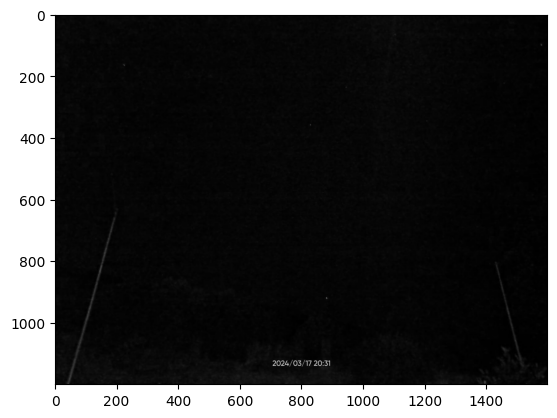

torch.Size([3, 600, 799]) tensor(0.0052)


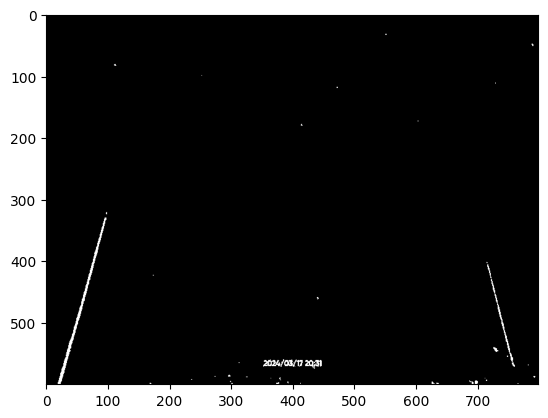

-----------------------------------


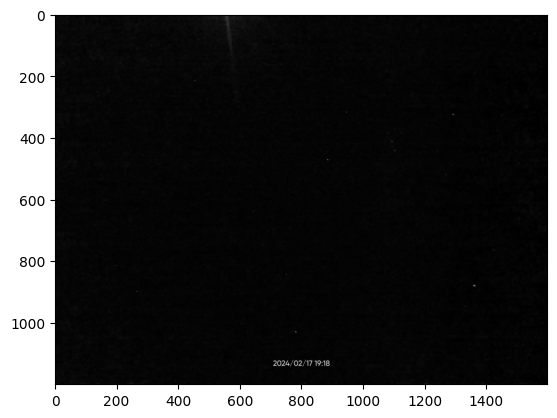

torch.Size([3, 600, 799]) tensor(0.0026)


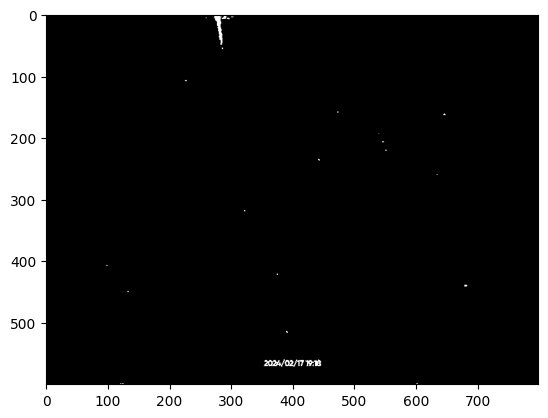

-----------------------------------


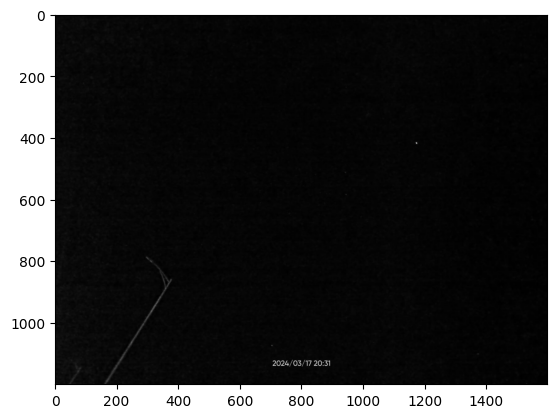

torch.Size([3, 600, 799]) tensor(0.0044)


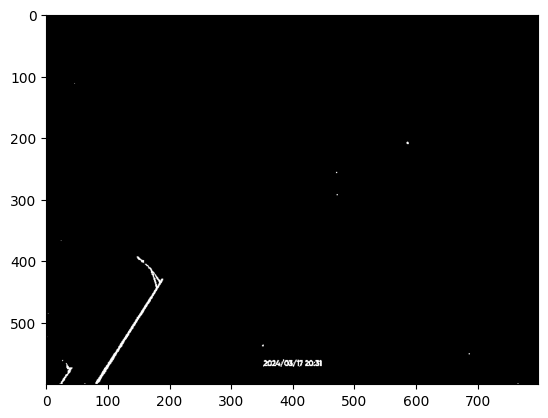

-----------------------------------


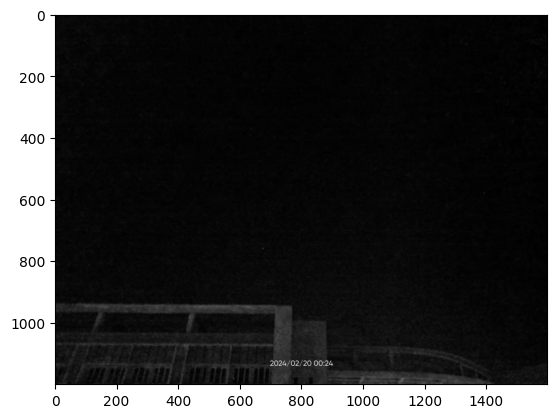

torch.Size([3, 600, 799]) tensor(0.0825)


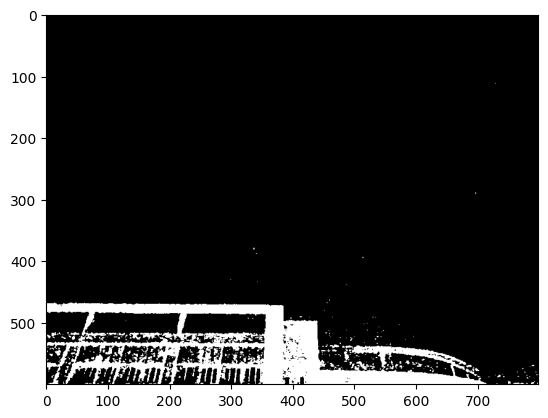

-----------------------------------


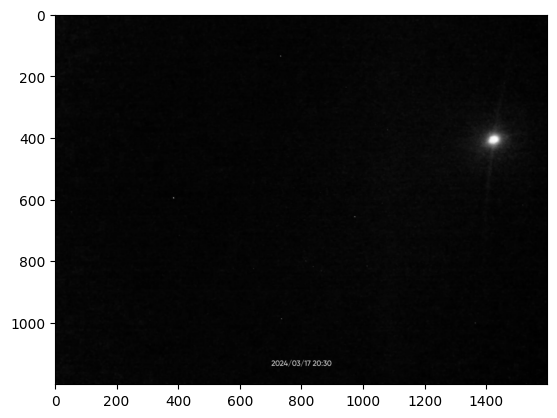

torch.Size([3, 600, 799]) tensor(0.0077)


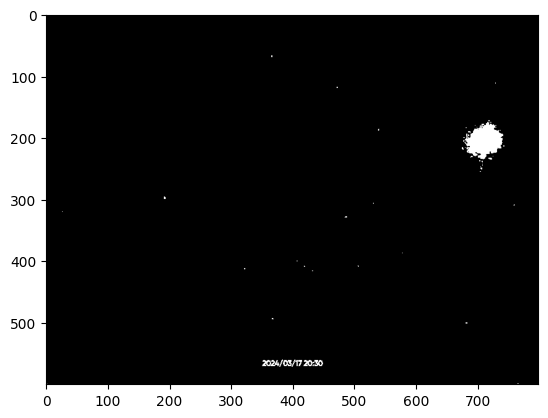

-----------------------------------


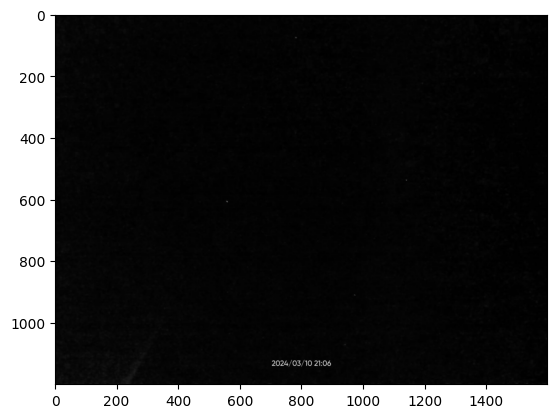

torch.Size([3, 600, 799]) tensor(0.0015)


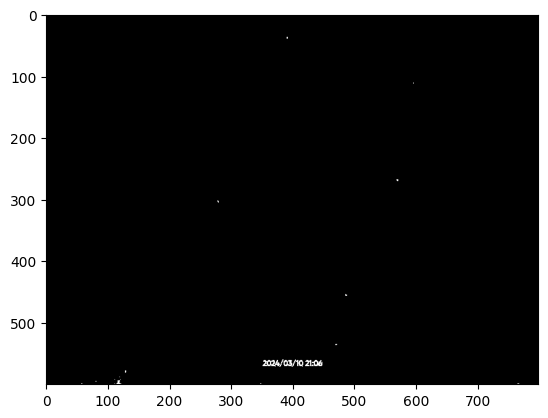

-----------------------------------


In [46]:

for i in range(1,7):
    path = f'critical_images/{i}.jpeg'
    plt.imshow(load_image(path)[0], cmap='gray')
    plt.show()
    img = pranav_camera(path)
    plt.imshow(img[0], cmap='gray')
    print(img.shape, img.count_nonzero()/img.numel())
    plt.show()
    print('-----------------------------------')

In [43]:
faster_rcnn_model= torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
faster_rcnn_model.eval()


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

[{'boxes': tensor([], size=(0, 4), grad_fn=<StackBackward0>), 'labels': tensor([], dtype=torch.int64), 'scores': tensor([], grad_fn=<IndexBackward0>)}]
critical_images/1.jpeg
[{'boxes': tensor([], size=(0, 4), grad_fn=<StackBackward0>), 'labels': tensor([], dtype=torch.int64), 'scores': tensor([], grad_fn=<IndexBackward0>)}]


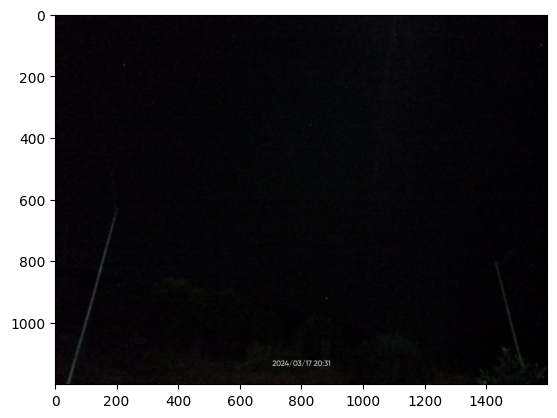

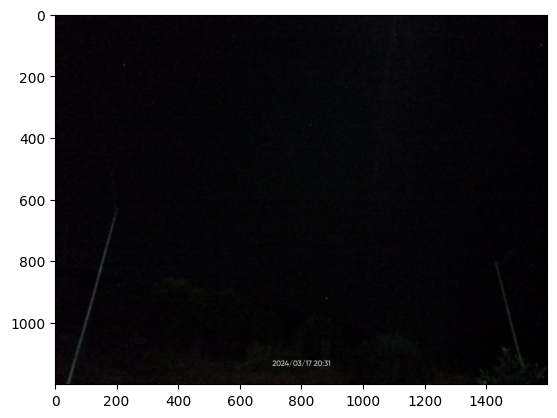

-----------------------------------
critical_images/2.jpeg
[{'boxes': tensor([], size=(0, 4), grad_fn=<StackBackward0>), 'labels': tensor([], dtype=torch.int64), 'scores': tensor([], grad_fn=<IndexBackward0>)}]


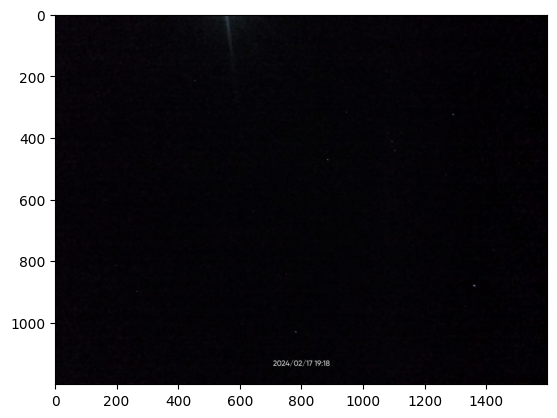

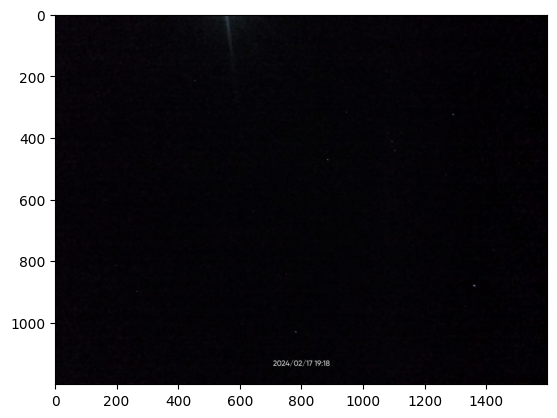

-----------------------------------
critical_images/3.jpeg
[{'boxes': tensor([], size=(0, 4), grad_fn=<StackBackward0>), 'labels': tensor([], dtype=torch.int64), 'scores': tensor([], grad_fn=<IndexBackward0>)}]


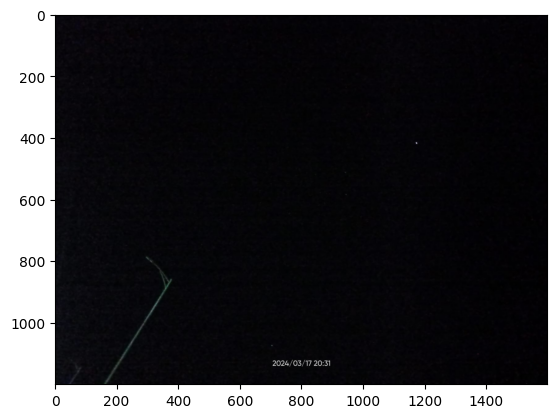

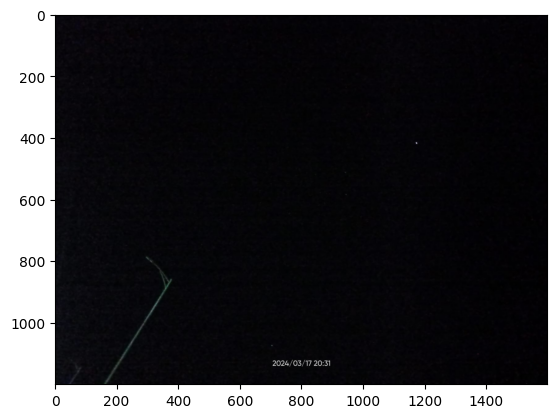

-----------------------------------
critical_images/4.jpeg
[{'boxes': tensor([], size=(0, 4), grad_fn=<StackBackward0>), 'labels': tensor([], dtype=torch.int64), 'scores': tensor([], grad_fn=<IndexBackward0>)}]


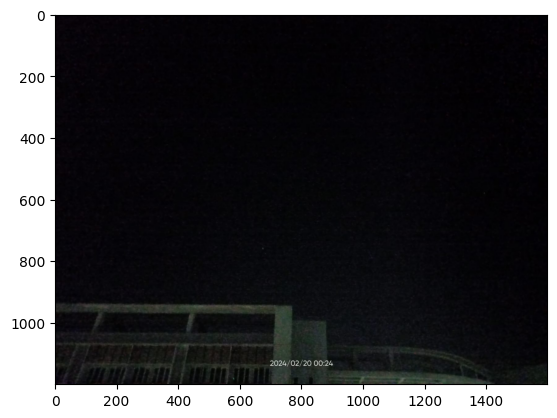

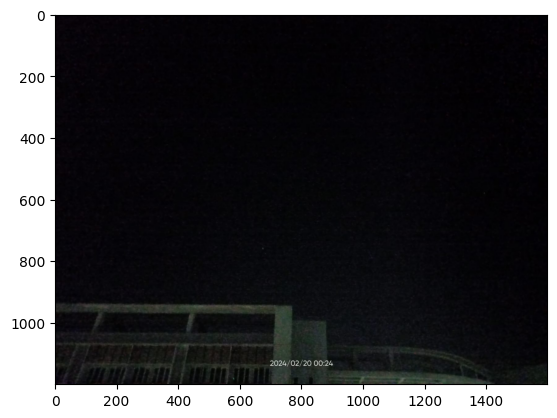

-----------------------------------
critical_images/5.jpeg
[{'boxes': tensor([], size=(0, 4), grad_fn=<StackBackward0>), 'labels': tensor([], dtype=torch.int64), 'scores': tensor([], grad_fn=<IndexBackward0>)}]


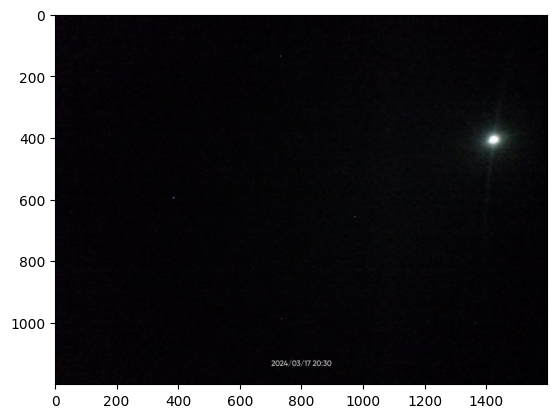

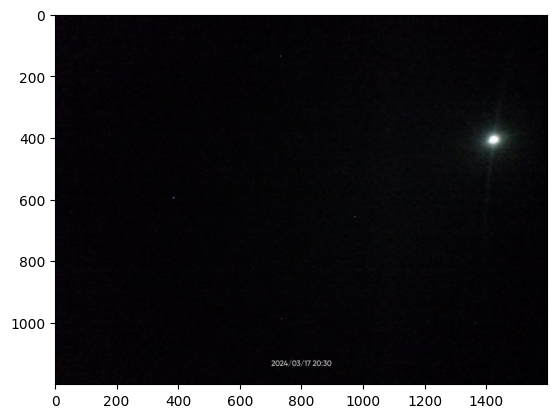

-----------------------------------
critical_images/6.jpeg
[{'boxes': tensor([], size=(0, 4), grad_fn=<StackBackward0>), 'labels': tensor([], dtype=torch.int64), 'scores': tensor([], grad_fn=<IndexBackward0>)}]


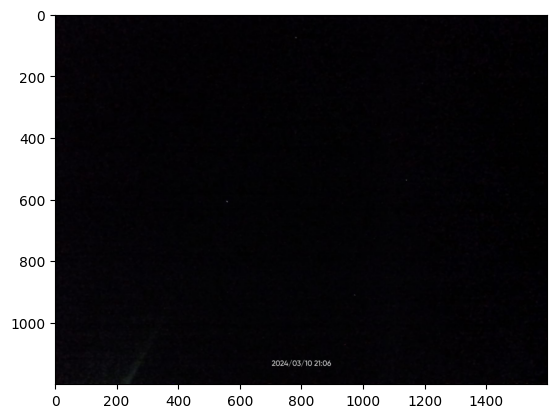

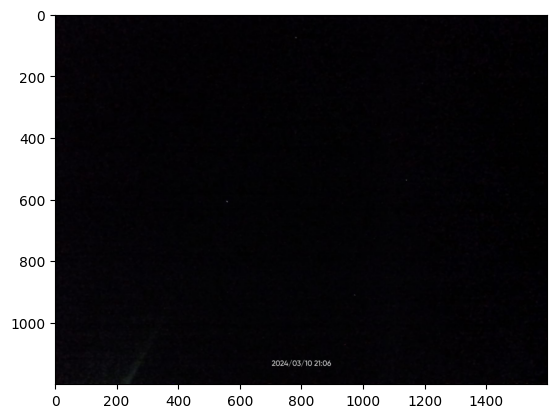

-----------------------------------


In [45]:

img = load_image('critical_images/1.jpeg')
output = faster_rcnn_model([img])
print(output)

# Lets plot the image with the bounding boxes
import matplotlib.pyplot as plt
import matplotlib.patches as patches

for i in range(1,7):
    path = f'critical_images/{i}.jpeg'
    print(path)
    img = load_image(path)
    output = faster_rcnn_model([img])
    print(output)
    image = Image.open(path)
    fig,ax = plt.subplots(1)
    ax.imshow(image)
    boxes = output[0]['boxes'].detach()
    fig, ax = plt.subplots(1)
    ax.imshow(image)
    for box in boxes:
        rect = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    plt.show()
    print('-----------------------------------')
    
    